###  CASE HISTORY
From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)

SUMMARY
From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)# Source:

Creator: B. GermanCentral Research EstablishmentHome Office Forensic Science ServiceAldermaston, Reading, Berkshire RG7 4PN

Donor: Vina Spiehler, Ph.D., DABFTDiagnostic Products Corporation(213) 776-0180 (ext 3014)

Data Set Information:
Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were obtained (# incorrect answers): Type of Sample * Beagle * NN * DAWindows that were float processed (87) * 10 * 12 * 21Windows that were not: (76) * 19 * 16 * 22 The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

Attribute Information:
Id number: 1 to 2142. RI: refractive index3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)4. Mg: Magnesium5. Al: Aluminum6. Si: Silicon7. K: Potassium8. Ca: Calcium9. Ba: Barium10. Fe: Iron11. Type of glass: (class attribute) * 1 building_windows_float_processed * 2 building_windows_non_float_processed * 3 vehicle_windows_float_processed * 4 vehicle_windows_non_float_processed (none in this database) * 5 containers * 6 tableware * 7 headlamps

# K Nearest Neighbors Project - Solution

**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Data

In [2]:
df = pd.read_csv('glass_data.csv')

In [3]:
df.head() 

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
column_a    214 non-null int64
column_b    214 non-null float64
column_c    214 non-null float64
column_d    214 non-null float64
column_e    214 non-null float64
column_f    214 non-null float64
column_g    214 non-null float64
column_h    214 non-null float64
column_i    214 non-null float64
column_j    214 non-null float64
column_k    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Standardize the Variables
Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('column_k',axis=1))
Scaled = scaler.transform(df.drop('column_k',axis=1))

In [6]:
scaledview = pd.DataFrame(Scaled,columns=df.columns[:-1])
scaledview.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Scaled,df['column_k'],
                                                    test_size=0.30)

In [9]:

import math
print(math .sqrt(len(y_train)))
print(len(y_train))

12.206555615733702
149


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [13]:
y_pre = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [15]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        30
           2       0.72      0.90      0.80        20
           3       0.00      0.00      0.00         2
           5       1.00      0.20      0.33         5
           6       0.33      0.50      0.40         2
           7       1.00      0.83      0.91         6

    accuracy                           0.82        65
   macro avg       0.66      0.56      0.56        65
weighted avg       0.83      0.82      0.80        65



In [16]:
confusion_matrix(y_test,y_pre)

array([[28,  2,  0,  0,  0,  0],
       [ 1, 18,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  1,  0],
       [ 0,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  5]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pre)

0.8153846153846154

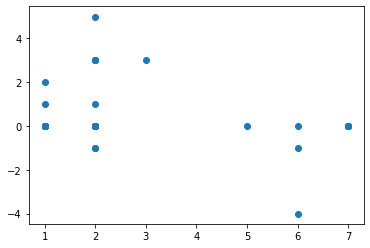

In [28]:
residuals = y_test - y_pre
residuals.mean()
plt.scatter(y_pre, residuals)

In [21]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

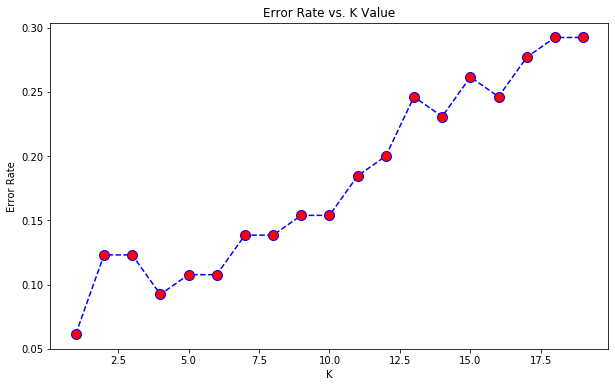

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#better keep the K value as square root of data points: thats is 11
#K =11 is the best